In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
def visualize_logs(logs, epochs = np.inf):
    epochs = min(epochs,len(logs['train_loss']))
    plt.plot(logs['train_loss'][:epochs],label = 'train')
    plt.plot(logs['valid_loss'][:epochs],label = 'valid')
    plt.yscale('log')
    plt.title("LOSS")
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    plt.plot(logs['train_top1'][:epochs],label = 'train')
    plt.plot(logs['valid_top1'][:epochs],label = 'valid')
    plt.yscale('log')
    plt.title("Accuracy")
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    plt.plot(logs['controller_loss'][:epochs],label = 'loss')
#    plt.yscale('log')
    plt.title("Controller loss")
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    try:
        plt.plot(logs['score_loss'][:epochs],label = 'loss')
    #    plt.yscale('log')
        plt.title("Score loss")
        plt.xlabel('epoch')
        plt.legend()
        plt.show()

        plt.plot(logs['entropy_penalty'][:epochs],label = 'loss')
    #    plt.yscale('log')
        plt.title("Entropy penalty")
        plt.xlabel('epoch')
        plt.legend()
        plt.show()
    except:
        pass
    
    print("Epoch:",np.argmax(logs['valid_top1'][:epochs]))
    print("VALIDATION TOP1 ACC:",np.max(logs['valid_top1'][:epochs]))

    mags = []
    for epoch in range(epochs):
        ops = []
        _mags = []
        _policy = np.concatenate(logs['policies'][epoch])
        for i in range(len(_policy)):
            
            ops.append(_policy[i][0][0])
            ops.append(_policy[i][1][0])
            _mags.append(int(float(_policy[i][0][1])*9))
            _mags.append(int(float(_policy[i][1][1])*9))
        
        for j in range(10):
            if epoch == 0:
                mags.append([(np.array(_mags) == j).sum()])
            else:
                mags[j].append((np.array(_mags) == j).sum())
        
    bars = []
    ind = np.arange(epochs)
    colors = ['black','dimgray','gray','darkgray','silver','lightgray','gainsboro','whitesmoke','snow','pink']
    labels = ['9','8','7','6','5','4','3','2','1','0']
    plt.stackplot(ind,*mags[::-1],colors = colors, labels = labels)
    plt.legend()
    plt.show()
#     plt.legend((p2[0], p1[0]), ('Upper', 'Bottom'))
        
#     print(ops)
#     print(mags)

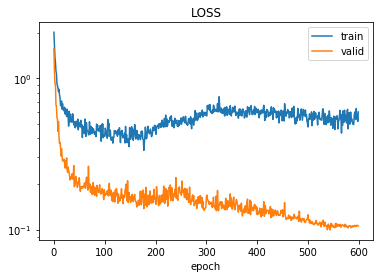

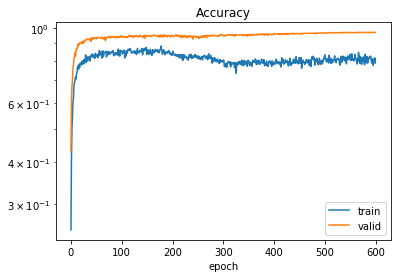

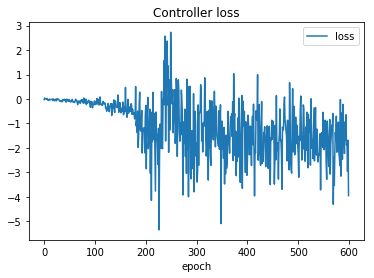

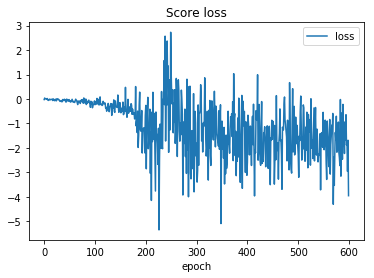

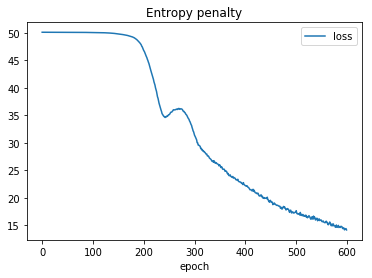

Epoch: 543
VALIDATION TOP1 ACC: 0.9714


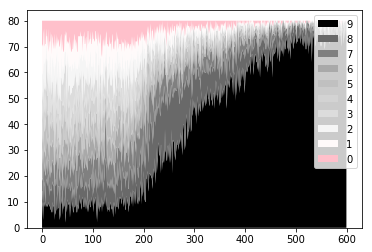

600 [[('TranslateY', 1.0), ('TranslateY', 1.0)], [('TranslateY', 1.0), ('TranslateY', 1.0)], [('ShearY', 1.0), ('TranslateY', 1.0)], [('Equalize', 0.8888888888888888), ('TranslateY', 1.0)], [('TranslateY', 1.0), ('TranslateY', 1.0)]]


In [18]:
path = '../src/logs/shake26_2x32d_cifar10_0/'
path = os.path.join(path,'logs.pkl')        
logs = pickle.load(open(path, "rb"))
visualize_logs(logs)
print(len(logs['policies']), logs['policies'][-1][0])
ep = len(logs['policies'])
# print(logs['policies'][30][0])
# print(logs['policies'][60][0])

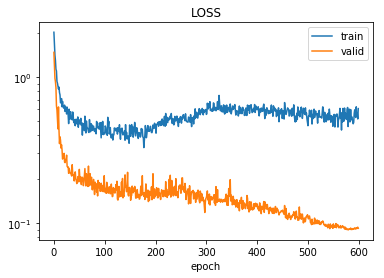

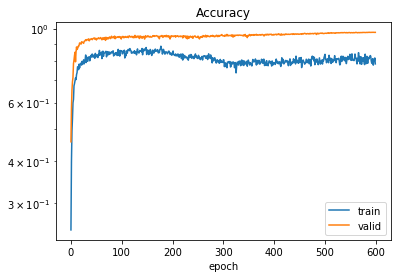

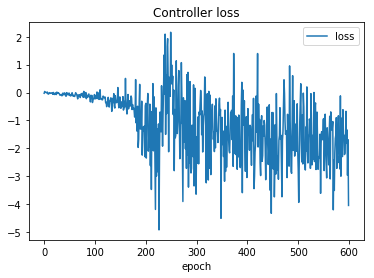

Epoch: 587
VALIDATION TOP1 ACC: 0.9749


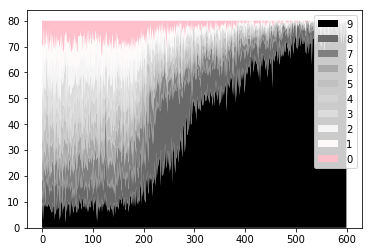

600 [[('TranslateY', 1.0), ('TranslateY', 1.0)], [('TranslateY', 1.0), ('TranslateY', 1.0)], [('ShearY', 1.0), ('TranslateY', 1.0)], [('Equalize', 0.8888888888888888), ('TranslateY', 1.0)], [('TranslateY', 1.0), ('TranslateY', 1.0)]]


In [19]:
path = '../src/logs/fail/shake26_2x32d_cifar10_0/'
path = os.path.join(path,'logs.pkl')       
logs = pickle.load(open(path, "rb"))
visualize_logs(logs,ep)
print(len(logs['policies']), logs['policies'][ep-1][0])
# print(logs['policies'][30][0])
# print(logs['policies'][60][0])